Funkcja obliczająca parowe oddziaływanie grawitacyjne

In [44]:
def acc_grav_2d(x_i, y_i, x_j, y_j, m_i, m_j, epsilon = 0.01):
    G=1
    dx = x_j-x_i
    dy = y_j-y_i
    r2 = dx**2 + dy**2 + epsilon**2
    r = r2**0.5
    ax_i = ((G*m_j)/(r**3))*(dx) 
    ay_i = ((G*m_j)/(r**3))*(dy) 
    ax_j = -((G*m_i)/(r**3))*(dx) 
    ay_j = -((G*m_i)/(r**3))*(dy)
    
    return ax_i, ay_i, ax_j, ay_j

Tworzymy funkcję zwracającą listy przyspieszeń

In [46]:
def compute_acc(x, y, m):
    N = len(x)
    ax = [0.0]*N
    ay = [0.0]*N
    for i in range(N):
        for j in range(i+1, N):
            ax_i, ay_i, ax_j, ay_j = acc_grav_2d(x[i], y[i], x[j], y[j], m[i], m[j])
            ax[i] += ax_i
            ay[i] += ay_i
            ax[j] += ax_j
            ay[j] += ay_j
    return ax, ay  

Tworzymy funkcję zwracającą energię całkowitą

In [48]:
def compute_energy(x, y, vx, vy, m):
    G = 1
    N = len(x)
    Ek = sum(0.5 * m[i] * (vx[i]**2 + vy[i]**2) for i in range(N))
    Ep = 0.0
    for i in range(N):
        for j in range(i+1, N):
            dx = x[j]-x[i]
            dy = y[j]-y[i]
            r = (dx**2 + dy**2)**0.5
            if r!=0:
                Ep -= G*m[i]*m[j]/r
    return Ek + Ep
            

In [50]:
import math
import json
import matplotlib.pyplot as plt

N = 3
dt = 0.005
steps = 1000

m = [1, 1, 1]
R = 1
v = 0.5
x = [R, -R/2, -R/2]
y = [0, R*math.sqrt(3)/2, -R*math.sqrt(3)/2]
vx = [0, -v, v]
vy = [v, -v/2, -v/2]

ax = [0.0]*N
ay = [0.0]*N

energy = []

ax, ay = compute_acc(x, y, m)

In [19]:
ax

[-0.5773214028789326, 0.2886607014394663, 0.2886607014394663]

In [21]:
ay

[0.0, -0.4999750010416262, 0.4999750010416262]

Główna pętla - algorytm Verleta (prędkościowy)

In [60]:
trajectories = [[] for _ in range(N)]

for step in range(steps):

    for i in range(N):
        trajectories[i].append((x[i], y[i]))
    
    for i in range(N):
        x[i] += vx[i]*dt + 0.5*ax[i]*dt**2
        y[i] += vy[i]*dt + 0.5*ay[i]*dt**2

    ax_new, ay_new = compute_acc(x, y, m)

    for i in range(N):
        vx[i] += 0.5*(ax[i]+ax_new[i])*dt
        vy[i] += 0.5*(ay[i]+ay_new[i])*dt

    ax, ay = ax_new, ay_new

    E = compute_energy(x, y, vx, vy, m)
    
    energy.append(E)

data = {
    "bodies": [
        [[float(x), float(y)] for (x, y) in body_traj]
        for body_traj in trajectories
    ]
}

with open("bodies_data.json", "w") as f:
    json.dump(data, f)
        

In [40]:
import matplotlib.pyplot as plt

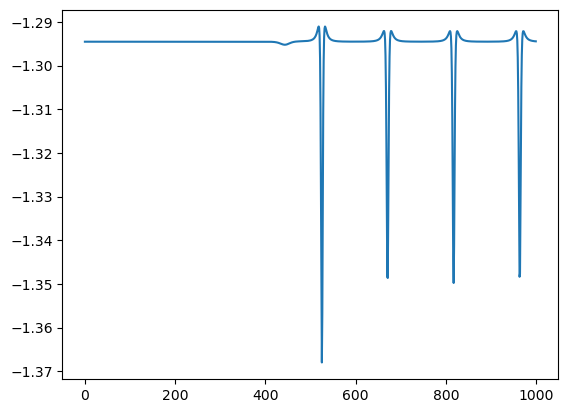

In [54]:
plt.plot(energy)